# Project One - Cumulative Return Visualization/test portfolio based on DCF model


In [14]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
from datetime import datetime 
import pandas_datareader.data as web
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

style.use('ggplot')

In [15]:
# Load .env enviroment variables
load_dotenv("/Users/brennanseanm/Jupyter-Workspace/.env")

True

## Part 1 - Pull in data using Alpaca to prove/test proof of concept

In [16]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [17]:
#Set the start and end date to prepare pulling stock date for up to 5 years
start_date = pd.Timestamp('2018-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [18]:
#Set the tickers in a Test portfolio based on stock selection given our DCF results to see if a stock is under or over valued

tickers = ['MSFT', 'AAPL', 'TSLA']
timeframe = "1D"

#portfolio_df = web.DataReader(tickers, data_source='yahoo', start='2017-01-01', end='2020-09-28')

# Get 5 years' worth of historical data from Aplaca for us in the MC simulation
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data in the data frame created from DCF stock picking solution
df_stock_data.dropna()
df_stock_data.head()

AAPL                                     MSFT  \
                             open    high     low   close    volume   open   
time                                                                         
2018-03-19 00:00:00-04:00  177.37  177.47  173.66  175.32  26080445  93.74   
2018-03-20 00:00:00-04:00  175.24  176.80  174.94  175.25  15303553  93.05   
2018-03-21 00:00:00-04:00  175.04  175.09  171.26  171.27  29835499  92.93   
2018-03-22 00:00:00-04:00  170.00  172.68  168.60  168.75  34791308  91.30   
2018-03-23 00:00:00-04:00  168.39  169.92  164.94  164.96  32035770  89.50   

                                                            TSLA          \
                            high    low  close    volume    open    high   
time                                                                       
2018-03-19 00:00:00-04:00  93.96  92.11  92.96  25643612  316.50  320.75   
2018-03-20 00:00:00-04:00  93.77  93.00  93.14  16733177  314.87  316.25   
2018-03-21 00:00:00-04:00  94.05  92.21  92.48  19375273  310.25  322.44   
2018-03-22 00:00:00-04:00  91.75  89.66  89.80  30929336  313.89  318.82   
2018-03-23 00:00:00-04:00  90.46  87.08  87.13  32580212  311.25  311.61   

                                                      
                              low     close   volume  
time                                                  
2018-03-19 00:00:00-04:00  309.67  313.5700  5808312  
2018-03-20 00:00:00-04:00  308.76  310.5500  3510966  
2018-03-21 00:00:00-04:00  310.19  316.5300  4703751  
2018-03-22 00:00:00-04:00  308.18  309.0766  3470601  
2018-03-23 00:00:00-04:00  300.45  301.5500  4974345

## Part 2: Create dataframe and set up for MonteCarlo simulation to analyze future returns to see if we can beat the SP500

In [19]:
# Configuring a Monte Carlo simulation to forecast for one year cumulative returns
num_sims = 50

MC_oneyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.25,.25],
    num_simulation = num_sims,
    num_trading_days = 252*1
)

In [20]:
# Printing the simulation input data
MC_oneyear.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-03-19 00:00:00-04:00  177.37  177.47  173.66  175.32  26080445   
2018-03-20 00:00:00-04:00  175.24  176.80  174.94  175.25  15303553   
2018-03-21 00:00:00-04:00  175.04  175.09  171.26  171.27  29835499   
2018-03-22 00:00:00-04:00  170.00  172.68  168.60  168.75  34791308   
2018-03-23 00:00:00-04:00  168.39  169.92  164.94  164.96  32035770   

                                         MSFT                                 \
                          daily_return   open   high    low  close    volume   
time                                                                           
2018-03-19 00:00:00-04:00          NaN  93.74  93.96  92.11  92.96  25643612   
2018-03-20 00:00:00-04:00    -0.000399  93.05  93.77  93.00  93.14  16733177   
2018-03-21 00:00:00-04:00    -0.022710  92.93  94.05  92.21  92.48  19375273   
2018-03-22 00:00:00-04:00    -0.014714  91.30  91.75  89.66  89.80  30929336   
2018-03-23 00:00:00-04:00    -0.022459  89.50  90.46  87.08  87.13  32580212   

                                          TSLA                            \
                          daily_return    open    high     low     close   
time                                                                       
2018-03-19 00:00:00-04:00          NaN  316.50  320.75  309.67  313.5700   
2018-03-20 00:00:00-04:00     0.001936  314.87  316.25  308.76  310.5500   
2018-03-21 00:00:00-04:00    -0.007086  310.25  322.44  310.19  316.5300   
2018-03-22 00:00:00-04:00    -0.028979  313.89  318.82  308.18  309.0766   
2018-03-23 00:00:00-04:00    -0.029733  311.25  311.61  300.45  301.5500   

                                                 
                            volume daily_return  
time                                             
2018-03-19 00:00:00-04:00  5808312          NaN  
2018-03-20 00:00:00-04:00  3510966    -0.009631  
2018-03-21 00:00:00-04:00  4703751     0.019256  
2018-03-22 00:00:00-04:00  3470601    -0.023547  
2018-03-23 00:00:00-04:00  4974345    -0.024352

In [21]:
# Monte Carlo Simulation setup
MC_oneyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.019721,0.986816,0.970364,0.968359,0.986388,0.972758,0.990232,0.938222,1.001376,0.990996,...,0.998813,1.027353,1.031140,0.967110,1.045455,0.985447,0.988990,0.989168,1.021299,1.058086
2,1.045767,0.997578,0.972857,0.960620,0.996217,0.954626,1.016206,0.964915,0.990297,0.969805,...,0.993690,0.988142,1.023881,0.966178,1.042336,1.001609,0.980160,1.033207,1.071734,1.053846
3,1.051606,1.016831,0.994611,0.954372,1.016557,0.938008,0.992764,0.964301,0.999011,0.994172,...,1.000777,0.973722,1.015677,0.964382,1.013946,0.984702,0.938817,1.056969,1.062402,1.034227
4,1.070999,0.986051,0.963255,0.970933,0.983578,0.943182,0.976241,0.953345,0.992325,0.982641,...,0.959484,0.975020,1.023541,0.962773,1.020098,0.987867,0.948380,1.067524,1.064792,1.022691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.976838,0.682137,1.032897,1.255337,1.206549,0.969954,1.118210,2.002276,1.052170,1.353187,...,0.766851,1.114575,1.453584,1.359401,0.810122,0.914214,0.967380,1.070968,2.010025,1.255202
249,0.988013,0.694873,1.011991,1.164235,1.256009,0.974376,1.146526,2.085416,1.062599,1.323456,...,0.735903,1.130164,1.499275,1.308617,0.816137,0.892026,0.980737,1.056357,2.028067,1.312084
250,0.967706,0.684305,1.052621,1.164851,1.246142,0.977123,1.109725,2.096976,1.083738,1.308908,...,0.726948,1.141453,1.461726,1.283600,0.819756,0.903900,0.990287,1.067763,2.033436,1.355012
251,0.983023,0.684626,1.077962,1.188914,1.254573,0.961912,1.054264,2.162971,1.078237,1.250701,...,0.720697,1.146830,1.477448,1.286661,0.831473,0.899252,1.002655,1.081152,2.044651,1.346601


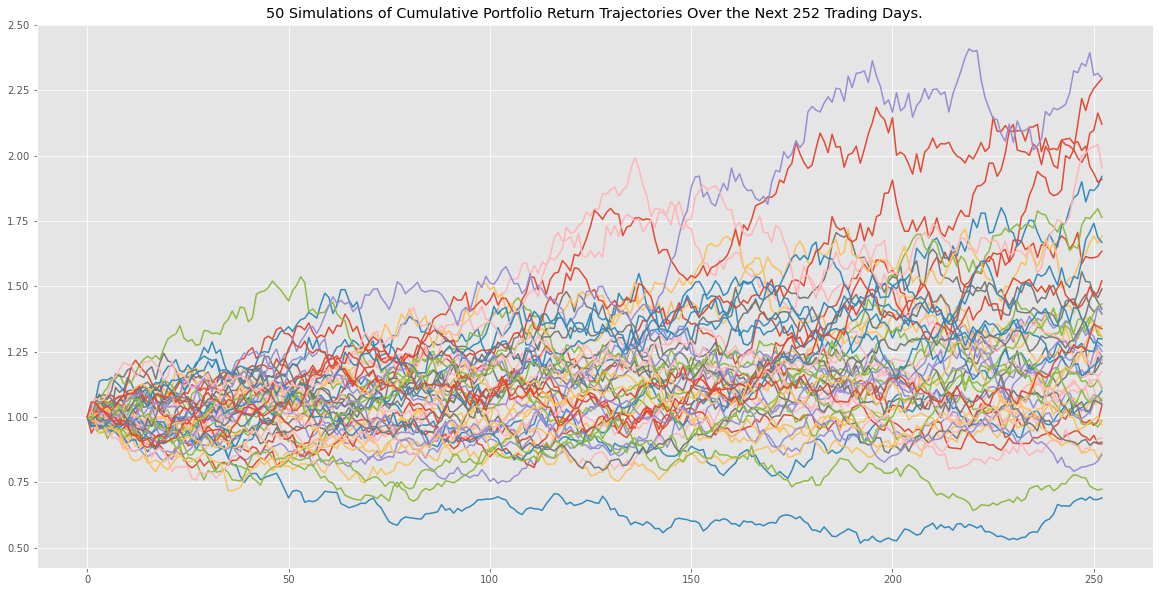

In [22]:
# Plot simulation outcomes
line_plot_oneyear = MC_oneyear.plot_simulation()

# Save the plot for future usage
line_plot_oneyear.get_figure().savefig("MC_oneyear_sim_plot.png", bbox_inches="tight")

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_oneyear = MC_oneyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_oneyear)


count           50.000000
mean             1.302999
std              0.377466
min              0.690419
25%              1.064887
50%              1.230771
75%              1.428186
max              2.296356
95% CI Lower     0.754260
95% CI Upper     2.254485
Name: 252, dtype: float64


In [24]:
# Set initial investment
initial_investment_oneyear = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_oneyear = round(tbl_oneyear[8]*initial_investment_oneyear,2)
ci_upper_oneyear = round(tbl_oneyear[9]*initial_investment_oneyear,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_oneyear} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_oneyear} and ${ci_upper_oneyear}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $15085.21 and $45089.69
